In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# label_size = 16
# text_size = 22
# mpl.rcParams['xtick.labelsize'] = label_size
# mpl.rcParams['ytick.labelsize'] = label_size
# mpl.rcParams['lines.linewidth'] = 1
# mpl.rcParams['legend.fontsize'] = 16
# #mpl.rcParams['legend.linewidth'] = 4
# mpl.rcParams['axes.titlesize'] = text_size
# mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['figure.figsize'] = (20,15)
mpl.rcParams['figure.dpi'] = 1200
mpl.rcParams['figure.autolayout'] = False
import seaborn as sns
plt.style.use('seaborn-darkgrid')
import IPython as ip
ip.core.display.set_matplotlib_formats('png', 'jpeg', quality=90)
%matplotlib inline

In [2]:
import pandas as pd 
import sqlite3

```__PREFETCH=off nvprof --print-gpu-trace --aggregate-mode off --event-collection-mode continuous --system-profiling on --kernel-latency-timestamps on --output-profile test3_3.prof --csv --log-file test3_10.csv  -f ./test3```

In [27]:
def get_power_values(x):
    # covert x into string
    y = str(x)
    return int(y.split('/')[0]) / 1000.

def get_freq_values(x):
    # covert x into string
    y = str(x)
    return int(y.split('/')[0])


In [45]:
system_types = {'freq':['[SM/Memory Clock (MHz)]',get_freq_values],
 'temp':['[Temperature (C)]', float ],
 'pwr':['[Power/Limit (mW)]',get_power_values]}

In [46]:
def read_nvprof_gpu_trace(trace, tag="", tag_it=False):
    list_of_lines = []
    with open(trace) as f:
        lines = f.readlines()

        for line in lines:
            if "==" in line:
                continue
            arr = line.strip().split(',')
            arr = [i.strip("\"") for i in arr] 
            list_of_lines.append(arr)
    titles = list_of_lines[0]
    if tag_it:
        titles = [tag+"_"+t for t in titles]
    print(titles)
    data = list_of_lines[2:]
#     print(len(data))
    data = [ d for d in data if len(d) == len(titles)]
#     return titles, data
    print(len(data))
    df = pd.DataFrame(data=data, columns=titles)
    df.to_csv("temp_out")
    df = pd.read_csv("temp_out", index_col=0)
    units = {i:j for i,j in zip(list_of_lines[0],list_of_lines[1])}
    devices = list(df.Device.unique())
    kind = list(df.Name.unique())
    kind_dict = {k:i for i,k in enumerate(kind)}
    df['ones'] = df['Name']
    df.ones = df.ones.replace(kind_dict)
    print(kind_dict)
    
    for k,v in system_types.items():
        df[k] = df[(df.Name == v[0])].System.apply(v[1])

    return df, units, devices, kind

In [47]:
# t,d =read_nvprof_gpu_trace("test1_1024.csv")

In [48]:
kind

['[SM/Memory Clock (MHz)]',
 '[Temperature (C)]',
 '[Power/Limit (mW)]',
 '[CUDA memcpy DtoH]',
 '[CUDA memcpy HtoD]',
 'volta_sgemm_128x32_sliced1x4_nn']

In [49]:
# for i,v in enumerate(d):
#     if len(v) != len(t):
#         print(i, len(v))

In [50]:
wdf, units, devices, kind = read_nvprof_gpu_trace("test1_32768_100.csv")
df, units, devices, kind = read_nvprof_gpu_trace("test2_2.csv")
# df, units, devices, kind = read_nvprof_gpu_trace("test2_1.csv")
# df, units, devices, kind = read_nvprof_gpu_trace("test2_2.csv")

['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'System', 'Name', 'Correlation_ID']
105104


/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'System', 'Name', 'Correlation_ID']
216805
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}


In [51]:
df.tail()

,Start,Duration,Grid X,Grid Y,Grid Z,Block X,Block Y,Block Z,Registers Per Thread,Static SMem,...,Device,Context,Stream,System,Name,Correlation_ID,ones,freq,temp,pwr
216800,1051.692726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tesla V100-SXM2-16GB (3),NaN,NaN,36,[Temperature (C)],NaN,1,NaN,36.0,NaN
216801,1051.693740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tesla V100-SXM2-16GB (0),NaN,NaN,77388/300000,[Power/Limit (mW)],NaN,2,NaN,NaN,77.388
216802,1051.694741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tesla V100-SXM2-16GB (1),NaN,NaN,62300/300000,[Power/Limit (mW)],NaN,2,NaN,NaN,62.300
216803,1051.695816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tesla V100-SXM2-16GB (2),NaN,NaN,39911/300000,[Power/Limit (mW)],NaN,2,NaN,NaN,39.911
216804,1051.696847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tesla V100-SXM2-16GB (3),NaN,NaN,39963/300000,[Power/Limit (mW)],NaN,2,NaN,NaN,39.963


In [52]:
units

{'Start': 's',
 'Duration': 's',
 'Grid X': '',
 'Grid Y': '',
 'Grid Z': '',
 'Block X': '',
 'Block Y': '',
 'Block Z': '',
 'Registers Per Thread': '',
 'Static SMem': 'KB',
 'Dynamic SMem': 'B',
 'Size': 'GB',
 'Throughput': 'GB/s',
 'SrcMemType': '',
 'DstMemType': '',
 'Device': '',
 'Context': '',
 'Stream': '',
 'System': '',
 'Name': '',
 'Correlation_ID': ''}

In [53]:
kind

['[SM/Memory Clock (MHz)]',
 '[Temperature (C)]',
 '[Power/Limit (mW)]',
 '[CUDA memcpy DtoH]',
 '[CUDA memcpy HtoD]',
 'volta_sgemm_128x32_sliced1x4_nn']

In [54]:
# kind_dict = {k:i for i,k in enumerate(kind)}

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


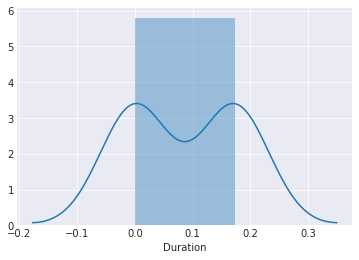

In [55]:
a = df[(df.Device == devices[0])& (df.Name == kind[-2])]['Duration']
sns.distplot(a)

In [56]:
# df[(df.Device == devices[0])& (df.Name == kind[-1])].describe()

In [57]:
# df['ones'] = df['Name']

In [58]:
# df.ones = df.ones.replace(kind_dict)

In [59]:
df.Start.max()

1051.6968470000002

In [60]:
wdf.Start.max()

525.223253

In [61]:
a = df[(df.Device == devices[0]) & ((df.Start > 205) & (df.Start < 210.5)) ]
b = wdf[(wdf.Device == devices[0]) & ((wdf.Start >201.5) & (wdf.Start < 207 ))]

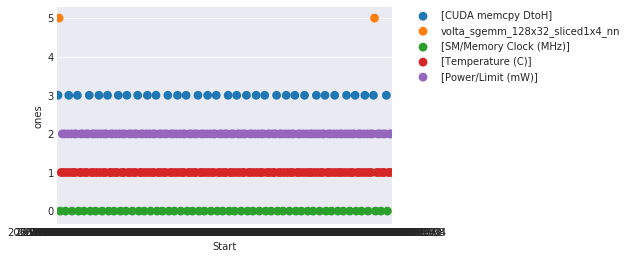

In [62]:
sns.pointplot(x='Start', y='ones', hue='Name', data=a)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

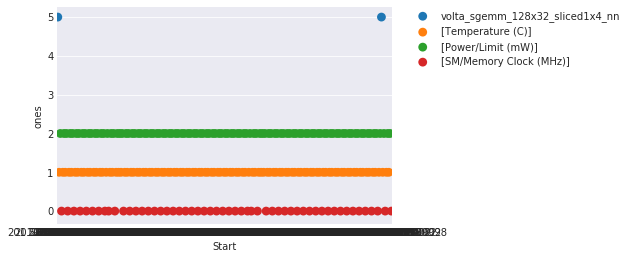

In [63]:
sns.pointplot(x='Start', y='ones', hue='Name', data=b)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

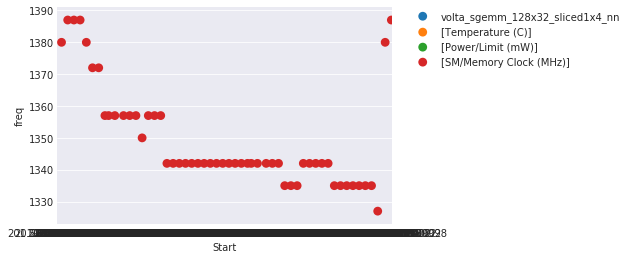

In [64]:
sns.pointplot(x='Start', y='freq', hue='Name', data=b)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

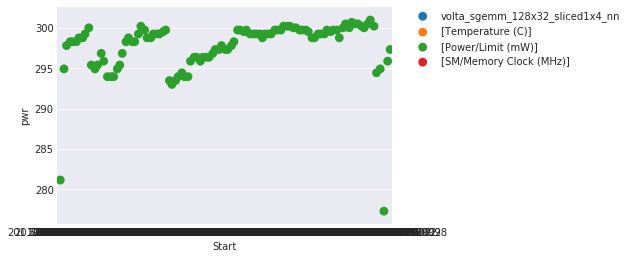

In [68]:
sns.pointplot(x='Start', y='pwr', hue='Name', data=b)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [23]:
df[60000:100000][(df.Device == devices[0]) & (df.Name == kind[-1])][['Start']]

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Start
60513,293.675486
61586,298.890140
62667,304.104430
63740,309.319191
64814,314.533956
65889,319.748524
66960,324.964096
68044,330.178939
69117,335.394273


In [ ]:
wdf[60000:100000][(wdf.Device == devices[0]) & (wdf.Name == kind[-1])]['Start']

In [ ]:
def get_power_values(x):
    # covert x into string
    y = str(x)
    return int(y.split('/')[0]) / 1000.

In [ ]:
wdf[60000:100000][(wdf.Device == devices[0]) & (wdf.Name == kind[-1])]['Duration'].describe()

In [ ]:
wdf[60000:100000][(wdf.Device == devices[0]) & (wdf.Name == kind[2])][['System', 'Start']]


In [ ]:
wdf[60000:100000][(wdf.Device == devices[0]) & (wdf.Name == kind[2])]['System'].apply(get_power_values).plot(kind='line')


In [ ]:
df[:][(df.Device == devices[0]) & (df.Name == kind[2])]['System'].apply(get_power_values).plot(kind='line')

In [ ]:
df[20544:21600][(df.Device == devices[0]) & (df.Name == kind[1])]['System'].apply(int).plot(title="Temperature")

In [ ]:
def get_freq_values(x):
    # covert x into string
    y = str(x)
    return int(y.split('/')[0])

In [ ]:
df[20544:21600][(df.Device == devices[0]) & (df.Name == kind[0])]['System'].apply(get_freq_values).plot()

In [ ]:
df[:][(df.Device == devices[0]) & (df.Name == kind[0])]['System'].apply(get_freq_values).plot()

In [ ]:
def read_sql_tables(filename):
    con = sqlite3.connect(filename)
    cursor = con.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    dict_of_dfs = {}
    for t in tables:
        dict_of_dfs[t[0]] = pd.read_sql(f"SELECT * from {t[0]}", con)
    return dict_of_dfs

In [ ]:
analysis = read_sql_tables("test3.prof")

In [ ]:
analysis_1 = read_sql_tables("test3_3.prof")

In [ ]:
for key in analysis.keys():
    print(key)

In [ ]:
df = analysis_1['CUPTI_ACTIVITY_KIND_DRIVER']

In [ ]:
df.describe()

In [ ]:
analysis_1['CUPTI_ACTIVITY_KIND_ENVIRONMENT']